In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 10   # you can increase it to 20,50,70, 100
optimizer = Adam()
verbosity = 1

In [3]:
(input_train, target_train), (input_test, target_test) = cifar10.load_data()
input_shape = (img_width, img_height, img_num_channels)

In [4]:
# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

In [5]:
# Normalize data
input_train = input_train / 255
input_test = input_test / 255

In [6]:
# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

In [7]:
# model.summary()

In [8]:
# Compile the model
model.compile(loss=loss_function, optimizer=optimizer,metrics=['accuracy'])

In [9]:
# Fit data to model (this will take little time to train)
history = model.fit(input_train, target_train, batch_size=batch_size, epochs=no_epochs, verbose=verbosity)

Epoch 1/10


1000/1000 [==============================] - 12s 11ms/step - loss: 1.5551 - accuracy: 0.4424
Epoch 2/10
1000/1000 [==============================] - 12s 12ms/step - loss: 1.1221 - accuracy: 0.6035
Epoch 3/10
1000/1000 [==============================] - 11s 11ms/step - loss: 0.9456 - accuracy: 0.6691
Epoch 4/10
1000/1000 [==============================] - 11s 11ms/step - loss: 0.8299 - accuracy: 0.7108
Epoch 5/10
1000/1000 [==============================] - 12s 12ms/step - loss: 0.7295 - accuracy: 0.7450
Epoch 6/10
1000/1000 [==============================] - 12s 12ms/step - loss: 0.6426 - accuracy: 0.7731
Epoch 7/10
1000/1000 [==============================] - 12s 12ms/step - loss: 0.5567 - accuracy: 0.8036
Epoch 8/10
1000/1000 [==============================] - 12s 12ms/step - loss: 0.4755 - accuracy: 0.8309
Epoch 9/10
1000/1000 [==============================] - 12s 12ms/step - loss: 0.4034 - accuracy: 0.8579
Epoch 10/10
1000/1000 [==============================] - 12s 1

In [10]:
# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')


Test loss: 1.0873491764068604 / Test accuracy: 0.7056000232696533


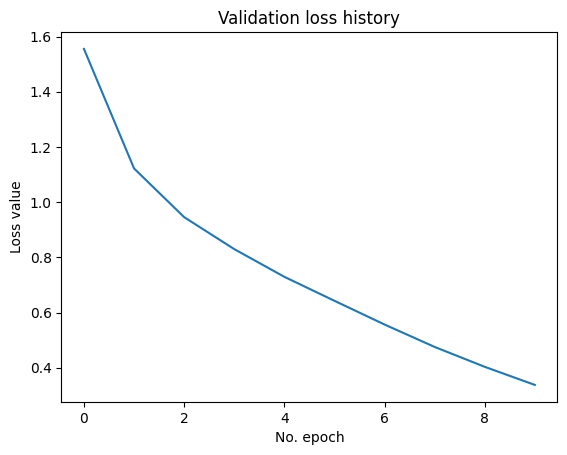

In [11]:
# Visualize history
# Plot history: Loss
plt.plot(history.history['loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

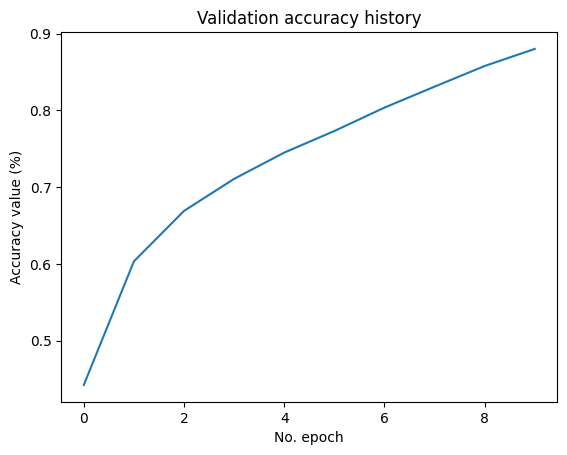

In [12]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [13]:
# By Adding k fold cross validation


from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np

# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 10
optimizer = Adam()
verbosity = 1
num_folds = 5

# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((input_train, input_test), axis=0)
targets = np.concatenate((target_train, target_test), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)



In [15]:
from tensorflow.keras.optimizers import SGD
# tensorflow.keras.optimizers.legacy.SGD(learning_rate=0.1)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(no_classes, activation='softmax'))

  # Compile the model
  model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
960/960 [==============================] - 12s 12ms/step - loss: 1.5624 - accuracy: 0.4341
Epoch 2/10
960/960 [==============================] - 11s 11ms/step - loss: 1.1384 - accuracy: 0.5961
Epoch 3/10
960/960 [==============================] - 11s 11ms/step - loss: 0.9646 - accuracy: 0.6628
Epoch 4/10
960/960 [==============================] - 12s 13ms/step - loss: 0.8411 - accuracy: 0.7057
Epoch 5/10
960/960 [==============================] - 11s 12ms/step - loss: 0.7392 - accuracy: 0.7425
Epoch 6/10
960/960 [==============================] - 11s 11ms/step - loss: 0.6422 - accuracy: 0.7753
Epoch 7/10
960/960 [==============================] - 11s 11ms/step - loss: 0.5561 - accuracy: 0.8064
Epoch 8/10
960/960 [==============================] - 11s 11ms/step - loss: 0.4699 - accuracy: 0.8341
Epoch 9/10
960/960 [==============================] - 11s 12ms/step - loss: 0.3939 - ac

KeyError: in user code:

    File "C:\Users\kargu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\kargu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\kargu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\kargu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1154, in train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\kargu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\optimizers\optimizer.py", line 544, in minimize
        self.apply_gradients(grads_and_vars)
    File "C:\Users\kargu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\optimizers\optimizer.py", line 1223, in apply_gradients
        return super().apply_gradients(grads_and_vars, name=name)
    File "C:\Users\kargu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\optimizers\optimizer.py", line 652, in apply_gradients
        iteration = self._internal_apply_gradients(grads_and_vars)
    File "C:\Users\kargu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\optimizers\optimizer.py", line 1253, in _internal_apply_gradients
        return tf.__internal__.distribute.interim.maybe_merge_call(
    File "C:\Users\kargu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\optimizers\optimizer.py", line 1345, in _distributed_apply_gradients_fn
        distribution.extended.update(
    File "C:\Users\kargu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\optimizers\optimizer.py", line 1342, in apply_grad_to_update_var  **
        return self._update_step(grad, var)
    File "C:\Users\kargu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\optimizers\optimizer.py", line 233, in _update_step
        raise KeyError(

    KeyError: 'The optimizer cannot recognize variable conv2d_4/kernel:0. This usually means you are trying to call the optimizer to update different parts of the model separately. Please call `optimizer.build(variables)` with the full list of trainable variables before the training loop or use legacy optimizer `tf.keras.optimizers.legacy.Adam.'


In [16]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 1.0641449689865112 - Accuracy: 70.89166641235352%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 70.89166641235352 (+- 0.0)
> Loss: 1.0641449689865112
------------------------------------------------------------------------
